<a href="https://colab.research.google.com/github/yayie77/Concepts-and-Technologies-of-AI/blob/main/Worksheet_6.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Implementation of Sigmoid Regression from Scratch.

This Notebook has two Section:

1. Building Helper Function:
  In this section we will implement various helper function required for scratch implementation of Sigmoid Regression.

2. Putting Helper Function to Action:
  In this section we will compile all our helper function to train and test the Sigmoid Regression on Provided Dataset.

# Building a Helper Function

## Sigmoid Function:
A function  $[\sigma: R → R] $  is said to be a sigmoid function, if the function is bounded, differentiable, real function that is defined for all real input values and has a non-negative derivative at each point and exactly on inflection point. The sigmoid fucntion has a characterstic "S" shaped curved also known as sigmoid curve.  [--- Wikipedia]

A comon example of a sigmoid function is the logistic function described as below:
$$ \sigma(x) = \frac{1}{1+e^{-x}}, $$

for $x \in \mathbb{R}$.

The next two code blocks construct and plot this function.
___

In [ ]:
def logistic_function(x):
  """
  Computes the logistic function applied to any value of x.
  Arguments:
    x: scalar or numpy array of any size.
  Returns:
    y: logistic function applied to x.
  """
  import numpy as np
  y = 1 / (1 + np.exp(-x))
  return y

In [ ]:
import numpy as np

def test_logistic_function():
    """
    Test cases for the logistic_function.
    """
    # Test with scalar input
    x_scalar = 0
    expected_output_scalar = round(1 / (1 + np.exp(0)), 3)  # Expected output: 0.5
    assert round(logistic_function(x_scalar), 3) == expected_output_scalar, "Test failed for scalar input"

    # Test with positive scalar input
    x_pos = 2
    expected_output_pos = round(1 / (1 + np.exp(-2)), 3)  # Expected output: ~0.881
    assert round(logistic_function(x_pos), 3) == expected_output_pos, "Test failed for positive scalar input"

    # Test with negative scalar input
    x_neg = -3
    expected_output_neg = round(1 / (1 + np.exp(3)), 3)  # Expected output: ~0.047
    assert round(logistic_function(x_neg), 3) == expected_output_neg, "Test failed for negative scalar input"

    # Test with numpy array input
    x_array = np.array([0, 2, -3])
    expected_output_array = np.array([0.5, 0.881, 0.047])  # Adjusted expected values rounded to 3 decimals
    # Use np.round to round the array element-wise and compare
    assert np.all(np.round(logistic_function(x_array), 3) == expected_output_array), "Test failed for numpy array input"

    print("All tests passed!")

# Run the test case
test_logistic_function()


All tests passed!


Explanation of the test cases:


Scalar input test: We check if the function gives the correct output for a scalar input (e.g., 0, 2, -3).


Numpy array test: We verify that the function can handle a numpy array as input and return the correct element-wise logistic function values.


Assertions: np.isclose and np.allclose are used for comparison to avoid issues with floating-point precision errors.


Running this test will check that the function works for both scalar and array inputs and ensures the correctness of the output values.

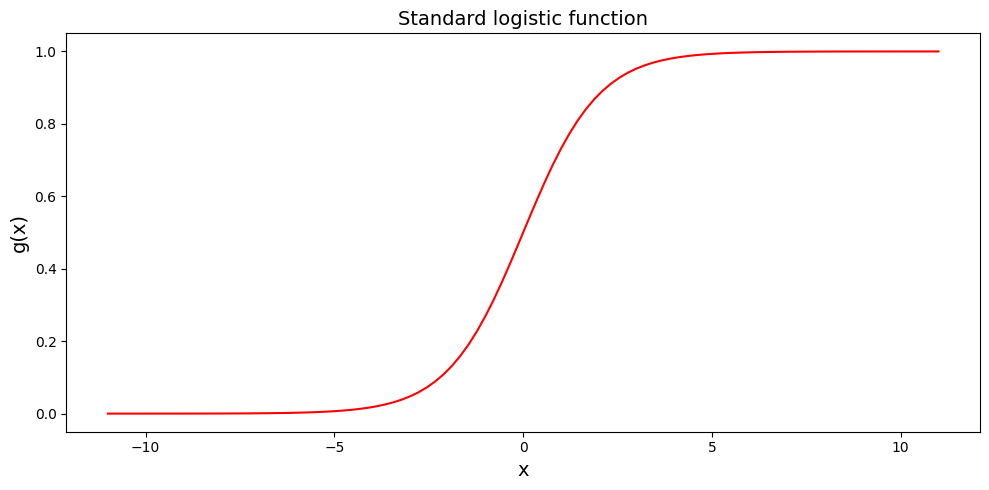

In [ ]:
# Plooting the sigmoid function:
import matplotlib.pyplot as plt
import numpy as np
plt.figure(figsize = (10, 5))
x = np.linspace(-11, 11, 100)
plt.plot(x, logistic_function(x), color = 'red')
plt.xlabel("x", fontsize = 14)
plt.ylabel("g(x)", fontsize = 14)
plt.title("Standard logistic function", fontsize = 14)
plt.tight_layout()
plt.show()

## Loss Function:
In general, loss function corresponds to observed error value between target value and predicted value for single observation/data points.
For Sigmoid Regression and Binary Classification we use log - loss given by:
$$ \mathcal{L}(y, \hat{y}) = -y \log\left(\hat{y}\right) - \left(1 - y\right) \log\left(1 - \hat{y}\right), $$
Where:
*   $y$ : True target value (taking values $0$ or $1$)
*   $\hat{y}$ : Predicted target value ( predicted probability of $y$ being $1$ and vice versa.)

The basic intution behind the log-loss function is, the loss value should be minimum when our predicted probability values are closer to true target value.

In [ ]:
def log_loss(y_true, y_pred):
  """
  Computes log loss for true target value y ={0 or 1} and predicted target value y' inbetween {0-1}.
  Arguments:
    y_true (scalar): true target value {0 or 1}.
    y_pred (scalar): predicted taget value {0-1}.
  Returns:
    loss (float): loss/error value
  """
  import numpy as np
  # Ensure y_pred is clipped to avoid log(0)
  y_pred = np.clip(y_pred, 1e-10, 1 - 1e-10)
  loss = -y_true * np.log(y_pred) - (1 - y_true) * np.log(1 - y_pred)
  return loss

### Verify the Intution.

In [ ]:
# Test function:
y_true, y_pred = 0, 0.1
print(f'log loss({y_true}, {y_pred}) ==> {log_loss(y_true, y_pred)}')
print("+++++++++++++--------------------------++++++++++++++++++++++++")
y_true, y_pred = 1, 0.9
print(f'log loss({y_true}, {y_pred}) ==> {log_loss(y_true, y_pred)}')

log loss(0, 0.1) ==> 0.10536051565782628
+++++++++++++--------------------------++++++++++++++++++++++++
log loss(1, 0.9) ==> 0.10536051565782628


In [ ]:
# Test function:for
y_true, y_pred = 0, 0.9
print(f'log loss({y_true}, {y_pred}) ==> {log_loss(y_true, y_pred)}')
print("+++++++++++++--------------------------++++++++++++++++++++++++")
y_true, y_pred = 1, 0.1
print(f'log loss({y_true}, {y_pred}) ==> {log_loss(y_true, y_pred)}')

log loss(0, 0.9) ==> 2.302585092994046
+++++++++++++--------------------------++++++++++++++++++++++++
log loss(1, 0.1) ==> 2.3025850929940455


## Test the Loss Function

In [ ]:
def test_log_loss():
    """
    Test cases for the log_loss function.
    """
    import numpy as np

    # Test case 1: Perfect prediction (y_true = 1, y_pred = 1)
    y_true = 1
    y_pred = 1
    expected_loss = 0.0  # Log loss is 0 for perfect prediction
    assert np.isclose(log_loss(y_true, y_pred), expected_loss), "Test failed for perfect prediction (y_true=1, y_pred=1)"

    # Test case 2: Perfect prediction (y_true = 0, y_pred = 0)
    y_true = 0
    y_pred = 0
    expected_loss = 0.0  # Log loss is 0 for perfect prediction
    assert np.isclose(log_loss(y_true, y_pred), expected_loss), "Test failed for perfect prediction (y_true=0, y_pred=0)"

    # Test case 3: Incorrect prediction (y_true = 1, y_pred = 0)
    y_true = 1
    y_pred = 0
    try:
        log_loss(y_true, y_pred)  # This should raise an error due to log(0)
    except ValueError:
        pass  # Test passed if ValueError is raised for log(0)

    # Test case 4: Incorrect prediction (y_true = 0, y_pred = 1)
    y_true = 0
    y_pred = 1
    try:
        log_loss(y_true, y_pred)  # This should raise an error due to log(0)
    except ValueError:
        pass  # Test passed if ValueError is raised for log(0)

    # Test case 5: Partially correct prediction
    y_true = 1
    y_pred = 0.8
    expected_loss = -(1 * np.log(0.8)) - (0 * np.log(0.2))  # ~0.2231
    assert np.isclose(log_loss(y_true, y_pred), expected_loss, atol=1e-6), "Test failed for partially correct prediction (y_true=1, y_pred=0.8)"

    y_true = 0
    y_pred = 0.2
    expected_loss = -(0 * np.log(0.2)) - (1 * np.log(0.8))  # ~0.2231
    assert np.isclose(log_loss(y_true, y_pred), expected_loss, atol=1e-6), "Test failed for partially correct prediction (y_true=0, y_pred=0.2)"

    print("All tests passed!")

# Run the test case
test_log_loss()


All tests passed!


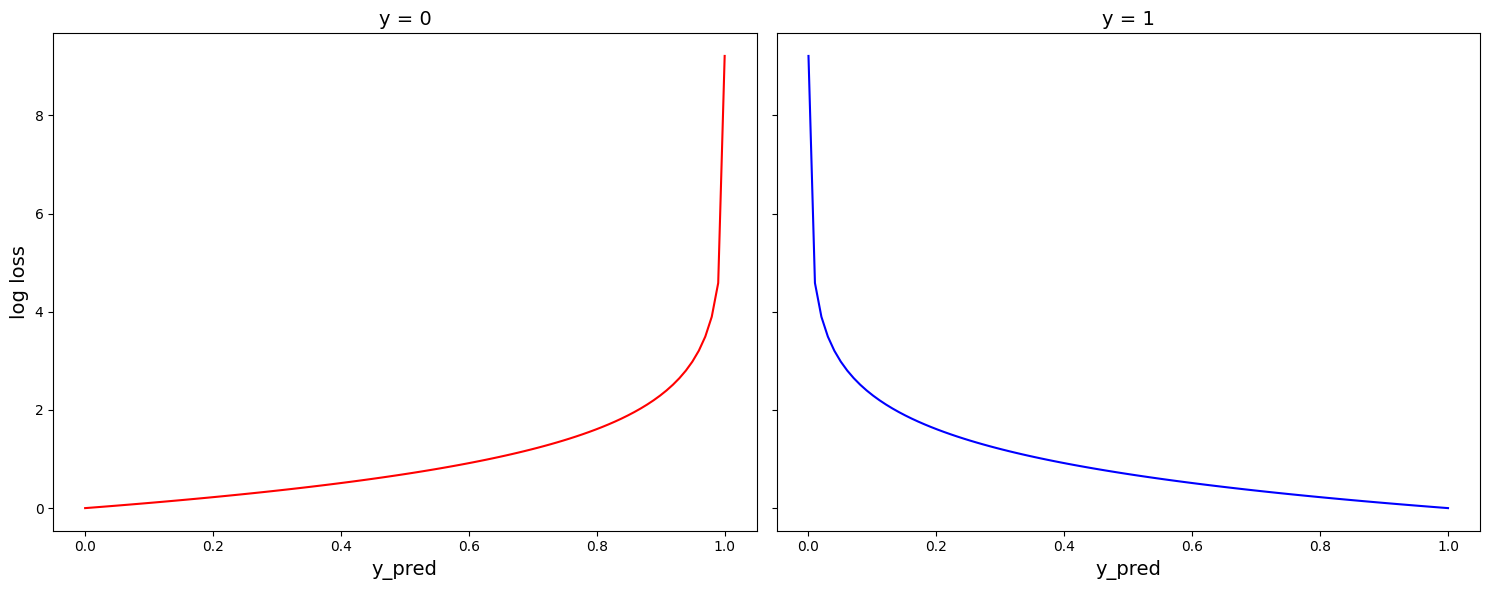

In [ ]:
# Plot the loss Function:
import matplotlib.pyplot as plt
fig, ax = plt.subplots(1, 2, figsize = (15, 6), sharex = True, sharey = True)
y_pred = np.linspace(0.0001, 0.9999, 100)
ax[0].plot(y_pred, log_loss(0, y_pred), color = 'red')
ax[0].set_title("y = 0", fontsize = 14)
ax[0].set_xlabel("y_pred", fontsize = 14)
ax[0].set_ylabel("log loss", fontsize = 14)
ax[1].plot(y_pred, log_loss(1, y_pred), color = 'blue')
ax[1].set_title("y = 1", fontsize = 14)
ax[1].set_xlabel("y_pred", fontsize = 14)
plt.tight_layout()
plt.show()

### plot for total loss

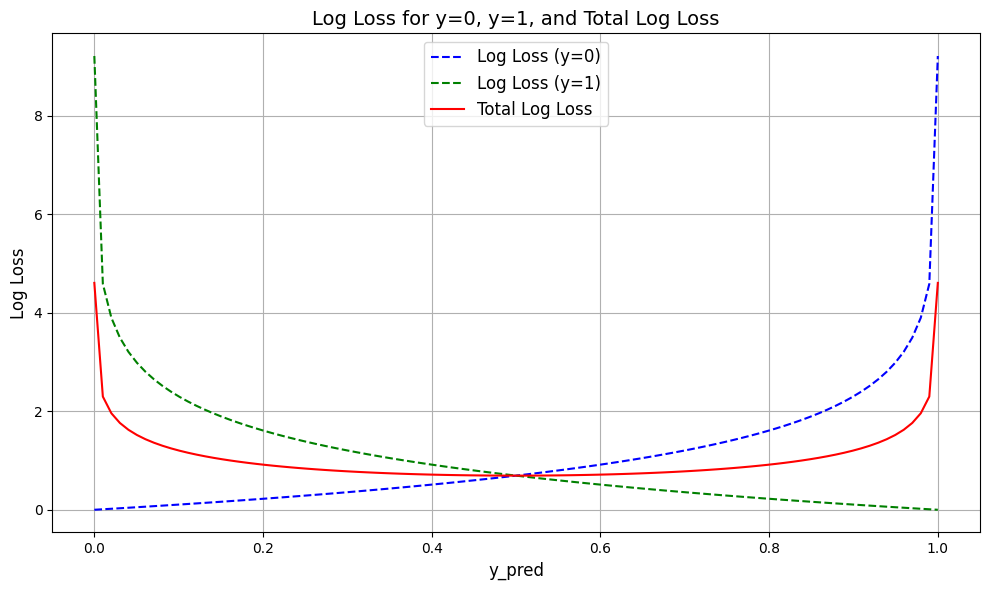

In [ ]:
# Generate predicted probabilities
y_pred = np.linspace(0.0001, 0.9999, 100)

# Compute log losses for y = 0 and y = 1
log_loss_0 = log_loss(0, y_pred)
log_loss_1 = log_loss(1, y_pred)

# Compute total log loss as a weighted sum (assuming equal weights here for simplicity)
total_log_loss = 0.5 * log_loss_0 + 0.5 * log_loss_1

# Plot the results
plt.figure(figsize=(10, 6))
plt.plot(y_pred, log_loss_0, label="Log Loss (y=0)", color="blue", linestyle="--")
plt.plot(y_pred, log_loss_1, label="Log Loss (y=1)", color="green", linestyle="--")
plt.plot(y_pred, total_log_loss, label="Total Log Loss", color="red")
plt.title("Log Loss for y=0, y=1, and Total Log Loss", fontsize=14)
plt.xlabel("y_pred", fontsize=12)
plt.ylabel("Log Loss", fontsize=12)
plt.legend(fontsize=12)
plt.grid(True)
plt.tight_layout()
plt.show()

### Cost Function - Binary Classification:
As described above, we determine the cost function as an average of loss function value calculated for each observation/datapoints.

Let $y = [y_1,....,y_n]$ be the true target values{(0 or 1)}

and $\hat{y} = [\hat{y_1},....,\hat{y_n}]$ be the corresponding predicted target values in between {$[0 \leq \hat{y} \leq 1]$},


Then the cost function be:

$$ Cost(\mathbf{y}, \mathbf{\hat{y}}) = \frac{1}{n}\sum_{i = 1}^n \mathcal{L}(y_i, \hat{y_i}).\tag{1} $$


In [ ]:
# Cost function - using vectorization
def cost_function(y_true, y_pred):
    """
    Computes log loss for inputs true value (0 or 1) and predicted value (between 0 and 1)
    Args:
      y_true    (array_like, shape (m,)): array of true values (0 or 1)
      y_pred (array_like, shape (m,)): array of predicted values (probability of y_pred being 1)
    Returns:
      cost (float): nonnegative cost corresponding to y_true and y_pred
    """
    assert len(y_true) == len(y_pred), "Length of true values and length of predicted values do not match"
    n = len(y_true)
    loss_vec = y_true * np.log(y_pred) + (1 - y_true) * np.log(1 - y_pred)
    cost = -np.sum(loss_vec) / n
    return cost

y_true, y_pred = np.array([0, 1, 0]), np.array([0.4, 0.6, 0.25])
print(f"cost_function({y_true}, {y_pred}) = {cost_function(y_true, y_pred)}")

cost_function([0 1 0], [0.4  0.6  0.25]) = 0.43644443999458743


In [ ]:
import numpy as np

# Test function for the cost_function
def test_cost_function():
    # Test case 1: Simple example with known expected cost
    y_true = np.array([1, 0, 1])
    y_pred = np.array([0.9, 0.1, 0.8])

    # Expected output: Manually calculate cost for these values
    # log_loss(y_true, y_pred) for each example
    expected_cost = (-(1 * np.log(0.9)) - (1 - 1) * np.log(1 - 0.9) +
                     -(0 * np.log(0.1)) - (1 - 0) * np.log(1 - 0.1) +
                     -(1 * np.log(0.8)) - (1 - 1) * np.log(1 - 0.8)) / 3

    # Call the cost_function to get the result
    result = cost_function(y_true, y_pred)

    # Assert that the result is close to the expected cost with a tolerance of 1e-6
    assert np.isclose(result, expected_cost, atol=1e-6), f"Test failed: {result} != {expected_cost}"

    print("Test passed for simple case!")

# Run the test case
test_cost_function()


Test passed for simple case!


## Extending the cost function for logistic regression to be used with model parameters.
Function we are estimating:

$$ \hat{y} = \sigma\left(\mathbf{x} \cdot \mathbf{w^T} + b\right) = \frac{1}{1 + e^{-\left(\mathbf{x} \cdot \mathbf{w^T} + b\right)}}. \tag{1} $$

Where:
- $\mathbf{w}$ parameters (Coefficinet of feature variable) also known as weights.
-$b$ parameters ( intercept of the function) also known as bias.

Assume;
- $X_{n\times d}$ $\in \mathbb{R}$: Feature Matirix of $n\times d$ independent variables;
- $Y_n$: Vector of n dependent variables;
- $\hat{Y}_n$: Vector of n predicted variables; and are represented as follows:

$$ \mathbf{X_{n\times d}} = \begin{pmatrix}
x_{1,1} & x_{1,2} & \cdots & x_{1,d} \newline
x_{2,1} & x_{2,2} & \cdots & x_{2,d} \newline
\vdots & \vdots & \ddots & \vdots \newline
x_{n,1} & x_{n,2} & \cdots & x_{n,d}
\end{pmatrix},\;\;\;\;
\mathbf{Y_n} = \begin{pmatrix}
y_1 \newline
y_2 \newline
\vdots \newline
y_n
\end{pmatrix},\;\;\;\;
\mathbf{\hat{Y}_n} = \begin{pmatrix}
\sigma\left(\mathbf{x_1} \cdot \mathbf{{w^T}} + b_1\right) \newline
\sigma\left(\mathbf{x_2} \cdot \mathbf{w^T} + b_2\right) \newline
\vdots \newline
\sigma\left(\mathbf{x_n} \cdot \mathbf{w^T} + b_n\right)
\end{pmatrix}. \tag{2} $$

Here: $$ \mathbf{x_i} = x_{i,1}\cdot \mathbf{w_{i,1}^T} + \dots + x_{i,d}\cdot\mathbf{w_{i,d}^T}+b_i $$


Now rewrite cost funtion defined in $(0)$ for model parameters as:

$$ \mathcal{L}\left(\mathbf{w}, b\right) := C\left(\mathbf{y}, \mathbf{\hat{y}} \,\vert\, \mathbf{X}, \mathbf{w}, b \right) = \frac{1}{n}\sum_{i = 1}^n L\left(y_i, \frac{1}{1 + e^{-\left(\mathbf{x_i} \cdot \mathbf{w} + b\right)}}\right) $$
$$= \frac{1}{n}\sum_{i = 1}^n \left[ -y_i \log\left(\frac{1}{1 + e^{-\left(\mathbf{x_i} \cdot \mathbf{w} + b\right)}}\right) - \left(1 - y_i\right) \log\left(1 - \frac{1}{1 + e^{-\left(\mathbf{x_i} \cdot \mathbf{w} + b\right)}}\right) \right]. \tag{3} $$

In [ ]:
# Function to compute cost function in terms of model parameters - using vectorization
def costfunction_logreg(X, y, w, b):
    """
    Computes the cost function, given data and model parameters.
    Args:
      X (ndarray, shape (m,n)): data on features, m observations with n features.
      y (array_like, shape (m,)): array of true values of target (0 or 1).
      w (array_like, shape (n,)): weight parameters of the model.
      b (float): bias parameter of the model.
    Returns:
      cost (float): nonnegative cost corresponding to y and y_pred.
    """
    m, n = X.shape
    assert len(y) == m, "Number of feature observations and number of target observations do not match."
    assert len(w) == n, "Number of features and number of weight parameters do not match."

    # Compute z using np.dot
    z = np.dot(X, w) + b

    # Compute predictions using logistic function (sigmoid)
    y_pred = logistic_function(z)

    # Compute the cost using the cost function
    cost = cost_function(y, y_pred)

    return cost
X, y, w, b = np.array([[10, 20], [-10, 10]]), np.array([1, 0]), np.array([0.5, 1.5]), 1
print(f"cost for logistic regression(X = {X}, y = {y}, w = {w}, b = {b}) = {costfunction_logreg(X, y, w, b)}")

cost for logistic regression(X = [[ 10  20]
 [-10  10]], y = [1 0], w = [0.5 1.5], b = 1) = 5.500008350784906


In [ ]:
def compute_gradient(X, y, w, b):
    """
    Computes gradients of the cost function with respect to model parameters.
    Args:
      X (ndarray, shape (n,d)): Input data, n observations with d features
      y (array_like, shape (n,)): True labels (0 or 1)
      w (array_like, shape (d,)): Weight parameters of the model
      b (float): Bias parameter of the model
    Returns:
      grad_w (array_like, shape (d,)): Gradients of the cost function with respect to the weight parameters
      grad_b (float): Gradient of the cost function with respect to the bias parameter
    """
    n, d = X.shape  # X has shape (n, d)
    assert len(y) == n, f"Expected y to have {n} elements, but got {len(y)}"
    assert len(w) == d, f"Expected w to have {d} elements, but got {len(w)}"

    # Compute predictions using logistic function (sigmoid)
    y_pred = logistic_function(np.dot(X, w) + b)  # Compute z = X * w + b

    # Compute gradients
    grad_w = (1/n) * np.dot(X.T, (y_pred - y)) # Gradient w.r.t weights, shape (d,)
    grad_b = (1/n) * np.sum(y_pred - y)       # Gradient w.r.t bias, scalar

    return grad_w, grad_b

### Simple Test for Gradient Computations:

In [ ]:
# Simple test case
X = np.array([[10, 20], [-10, 10]])  # shape (2, 2)
y = np.array([1, 0])  # shape (2,)
w = np.array([0.5, 1.5])  # shape (2,)
b = 1  # scalar

# Assertion tests
try:
    grad_w, grad_b = compute_gradient(X, y, w, b)
    print("Gradients computed successfully.")
    print(f"grad_w: {grad_w}")
    print(f"grad_b: {grad_b}")
except AssertionError as e:
    print(f"Assertion error: {e}")

Gradients computed successfully.
grad_w: [-4.99991649  4.99991649]
grad_b: 0.4999916492890759


### Implementation of Gradient Descent for Sigmoid Regresssion.

In [ ]:
def gradient_descent(X, y, w, b, alpha, n_iter, show_cost=False, show_params=True):
    """
    Implements batch gradient descent to optimize logistic regression parameters.

    Args:
      X (ndarray, shape (n,d)): Data on features, n observations with d features
      y (array_like, shape (n,)): True values of target (0 or 1)
      w (array_like, shape (d,)): Initial weight parameters
      b (float): Initial bias parameter
      alpha (float): Learning rate
      n_iter (int): Number of iterations
      show_cost (bool): If True, displays cost every 100 iterations
      show_params (bool): If True, displays parameters every 100 iterations

    Returns:
      w (array_like, shape (d,)): Optimized weight parameters
      b (float): Optimized bias parameter
      cost_history (list): List of cost values over iterations
      params_history (list): List of parameters (w, b) over iterations
    """
    n, d = X.shape
    assert len(y) == n, "Number of observations in X and y do not match"
    assert len(w) == d, "Number of features in X and w do not match"

    cost_history = []
    params_history = []

    for i in range(n_iter):
        # Compute predictions
        y_pred = logistic_function(np.dot(X, w) + b)

        # Compute gradients
        error = y_pred - y  # Difference between predicted and true values
        grad_w = np.dot(X.T, error) / n  # Gradient for weights
        grad_b = np.mean(error)           # Gradient for bias

        # Update weights and bias
        w -= alpha * grad_w  # Update weights
        b -= alpha * grad_b  # Update bias

        # Compute cost
        cost = costfunction_logreg(X, y, w, b)

        # Store cost and parameters
        cost_history.append(cost)
        params_history.append((w.copy(), b))

        # Optionally print cost and parameters
        if show_cost and (i % 100 == 0 or i == n_iter - 1):
            print(f"Iteration {i}: Cost = {cost:.6f}")
        if show_params and (i % 100 == 0 or i == n_iter - 1):
            print(f"Iteration {i}: w = {w}, b = {b:.6f}")

    return w, b, cost_history, params_history


# Test the gradient_descent function with sample data
X = np.array([[0.1, 0.2], [-0.1, 0.1]])  # Shape (2, 2)
y = np.array([1, 0])                     # Shape (2,)
w = np.zeros(X.shape[1])                 # Shape (2,) - same as number of features
b = 0.0                                  # Scalar
alpha = 0.1                              # Learning rate
n_iter = 100000                           # Number of iterations

# Perform gradient descent
w_out, b_out, cost_history, params_history = gradient_descent(X, y, w, b, alpha, n_iter, show_cost=True, show_params=False)

# Print final parameters and cost
print("\nFinal parameters:")
print(f"w: {w_out}, b: {b_out}")
print(f"Final cost: {cost_history[-1]:.6f}")


Iteration 0: Cost = 0.692835
Iteration 100: Cost = 0.662662
Iteration 200: Cost = 0.634332
Iteration 300: Cost = 0.607704
Iteration 400: Cost = 0.582671
Iteration 500: Cost = 0.559128
Iteration 600: Cost = 0.536977
Iteration 700: Cost = 0.516126
Iteration 800: Cost = 0.496487
Iteration 900: Cost = 0.477978
Iteration 1000: Cost = 0.460524
Iteration 1100: Cost = 0.444052
Iteration 1200: Cost = 0.428497
Iteration 1300: Cost = 0.413797
Iteration 1400: Cost = 0.399895
Iteration 1500: Cost = 0.386736
Iteration 1600: Cost = 0.374272
Iteration 1700: Cost = 0.362457
Iteration 1800: Cost = 0.351248
Iteration 1900: Cost = 0.340607
Iteration 2000: Cost = 0.330495
Iteration 2100: Cost = 0.320880
Iteration 2200: Cost = 0.311730
Iteration 2300: Cost = 0.303016
Iteration 2400: Cost = 0.294710
Iteration 2500: Cost = 0.286789
Iteration 2600: Cost = 0.279228
Iteration 2700: Cost = 0.272007
Iteration 2800: Cost = 0.265104
Iteration 2900: Cost = 0.258502
Iteration 3000: Cost = 0.252182
Iteration 3100: Cost

In [ ]:
# Simple assertion test for gradient_descent
def test_gradient_descent():
    X = np.array([[0.1, 0.2], [-0.1, 0.1]])  # Shape (2, 2)
    y = np.array([1, 0])                     # Shape (2,)
    w = np.zeros(X.shape[1])                 # Shape (2,)
    b = 0.0                                  # Scalar
    alpha = 0.1                              # Learning rate
    n_iter = 100                             # Number of iterations

    # Run gradient descent
    w_out, b_out, cost_history, _ = gradient_descent(X, y, w, b, alpha, n_iter, show_cost=False, show_params=False)

    # Assertions
    assert len(cost_history) == n_iter, "Cost history length does not match the number of iterations"
    assert w_out.shape == w.shape, "Shape of output weights does not match the initial weights"
    assert isinstance(b_out, float), "Bias output is not a float"
    assert cost_history[-1] < cost_history[0], "Cost did not decrease over iterations"

    print("All tests passed!")

# Run the test
test_gradient_descent()


All tests passed!


### Visualizing Convergence of Cost During Gradient Descent:

This plot tracks how the cost decreases over iterations, providing insight into the convergence of the gradient descent algorithm.

It ensures the optimization is progressing as expected, helps detect issues like divergence, and aids in tuning hyperparameters effectively.








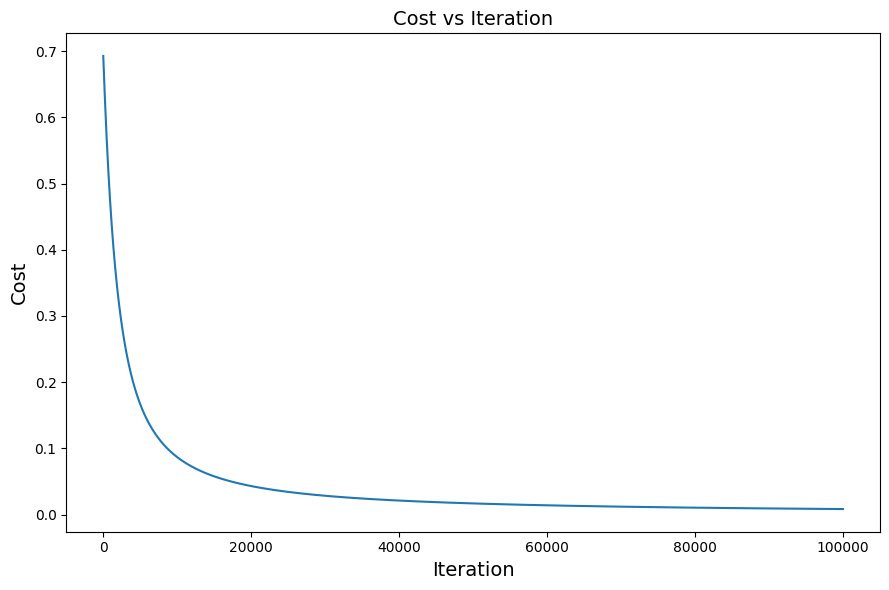

In [ ]:
# Plotting cost over iteration
plt.figure(figsize = (9, 6))
plt.plot(cost_history)
plt.xlabel("Iteration", fontsize = 14)
plt.ylabel("Cost", fontsize = 14)
plt.title("Cost vs Iteration", fontsize = 14)
plt.tight_layout()
plt.show()

### Decision Function
In Decsion function we perform following:
- Prediction:

  - Utilizing our trained weights and biases we first find the probabilities values y_probab for the x_test.
Then, Y_probabiliy value is transformed to discrete class value using Decision boubdry.
___
- Decision Boundry:
  - We first calculate the y_prediction as probabilities value, which is then converted to discrete class by using a threshold value. For instance, we take the threshold to be 0.5,then we classify the observation to class 1 and to class 0 otherwise.

In [ ]:
import numpy as np

def prediction(X, w, b, threshold=0.5):
    """
    Predicts binary outcomes for given input features based on logistic regression parameters.

    Arguments:
      X (ndarray, shape (n,d)): Array of test independent variables (features) with n samples and d features.
      w (ndarray, shape (d,)): Array of weights learned via gradient descent.
      b (float): Bias learned via gradient descent.
      threshold (float, optional): Classification threshold for predicting class labels. Default is 0.5.

    Returns:
      y_pred (ndarray, shape (n,)): Array of predicted dependent variable (binary class labels: 0 or 1).
    """
    # Compute the predicted probabilities using the logistic function
    y_test_prob = logistic_function(np.dot(X, w) + b)

    # Classify based on the threshold
    y_pred = (y_test_prob >= threshold).astype(int)

    return y_pred


In [ ]:
def test_prediction():
    X_test = np.array([[0.5, 1.0], [1.5, -0.5], [-0.5, -1.0]])  # Shape (3, 2)
    w_test = np.array([1.0, -1.0])                              # Shape (2,)
    b_test = 0.0                                                # Scalar bias
    threshold = 0.5                                             # Default threshold

    # Updated expected output
    expected_output = np.array([0, 1, 1])

    # Call the prediction function
    y_pred = prediction(X_test, w_test, b_test, threshold)

    # Assert that the output matches the expected output
    assert np.array_equal(y_pred, expected_output), f"Expected {expected_output}, but got {y_pred}"

    print("Test passed!")

test_prediction()

Test passed!


## Evaluation of the Classifier.

In [ ]:
# Evaluation Function: Computes confusion matrix, precision, recall, and F1-score
def evaluate_classification(y_true, y_pred):
    TP = np.sum((y_true == 1) & (y_pred == 1))  # True Positives
    TN = np.sum((y_true == 0) & (y_pred == 0))  # True Negatives
    FP = np.sum((y_true == 0) & (y_pred == 1))  # False Positives
    FN = np.sum((y_true == 1) & (y_pred == 0))  # False Negatives

    # Confusion matrix
    confusion_matrix = np.array([[TN, FP],
                                  [FN, TP]])

    # Precision, recall, and F1-score with safe handling of zero division
    precision = TP / (TP + FP) if (TP + FP) > 0 else 0.0
    recall = TP / (TP + FN) if (TP + FN) > 0 else 0.0
    f1_score = 2 * (precision * recall) / (precision + recall) if (precision + recall) > 0 else 0.0

    # Ensure metrics are floats
    precision = float(precision)
    recall = float(recall)
    f1_score = float(f1_score)

    # Return metrics as a dictionary
    return confusion_matrix, precision, recall, f1_score

# Putting Helper Function to Action.

Compiling and Training A sigmoid regression on Dataset.

## Some Basic Data operations, Loading, Analysis and Cleaning:

### Necessary Imports and Loading of the Dataset:

In [ ]:
# Load dataset
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
url = "https://raw.githubusercontent.com/jbrownlee/Datasets/master/pima-indians-diabetes.data.csv"
columns = ['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome']
data_pima_diabetes = pd.read_csv(url, names=columns)

### Some Basic Data Cleaning:

In [ ]:
# Data cleaning
columns_to_clean = ['Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI']
data_pima_diabetes[columns_to_clean] = data_pima_diabetes[columns_to_clean].replace(0, np.nan)
data_pima_diabetes.fillna(data_pima_diabetes.median(), inplace=True)

In [ ]:
data_pima_diabetes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    float64
 2   BloodPressure             768 non-null    float64
 3   SkinThickness             768 non-null    float64
 4   Insulin                   768 non-null    float64
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(6), int64(3)
memory usage: 54.1 KB


### Summary Statistics:

In [ ]:
data_pima_diabetes.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,121.656250,72.386719,29.108073,140.671875,32.455208,0.471876,33.240885,0.348958
std,3.369578,30.438286,12.096642,8.791221,86.383060,6.875177,0.331329,11.760232,0.476951
min,0.000000,44.000000,24.000000,7.000000,14.000000,18.200000,0.078000,21.000000,0.000000
25%,1.000000,99.750000,64.000000,25.000000,121.500000,27.500000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,29.000000,125.000000,32.300000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


## Train Test Split and Standard Scaling of the Dataset:

### Train - Test Split:

In [ ]:
# Train-test split
X = data_pima_diabetes.drop(columns=['Outcome']).values
y = data_pima_diabetes['Outcome'].values
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

### Standarize the Input Dataset:

In [ ]:
# Standardize features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

### Initialize the parameters and Hyper-parameters:

In [ ]:
# Initialize parameters
w = np.zeros(X_train_scaled.shape[1])
b = 0.0
alpha = 0.1
n_iter = 1000


### Start the Training:

In [ ]:
# Train model
print("\nTraining Logistic Regression Model:")
w, b, cost_history,params_history = gradient_descent(X_train_scaled, y_train, w, b, alpha, n_iter, show_cost=True, show_params=False)


Training Logistic Regression Model:
Iteration 0: Cost = 0.676575
Iteration 100: Cost = 0.465441
Iteration 200: Cost = 0.455913
Iteration 300: Cost = 0.453874
Iteration 400: Cost = 0.453316
Iteration 500: Cost = 0.453148
Iteration 600: Cost = 0.453096
Iteration 700: Cost = 0.453079
Iteration 800: Cost = 0.453074
Iteration 900: Cost = 0.453072
Iteration 999: Cost = 0.453071


### Observe the Cost History:

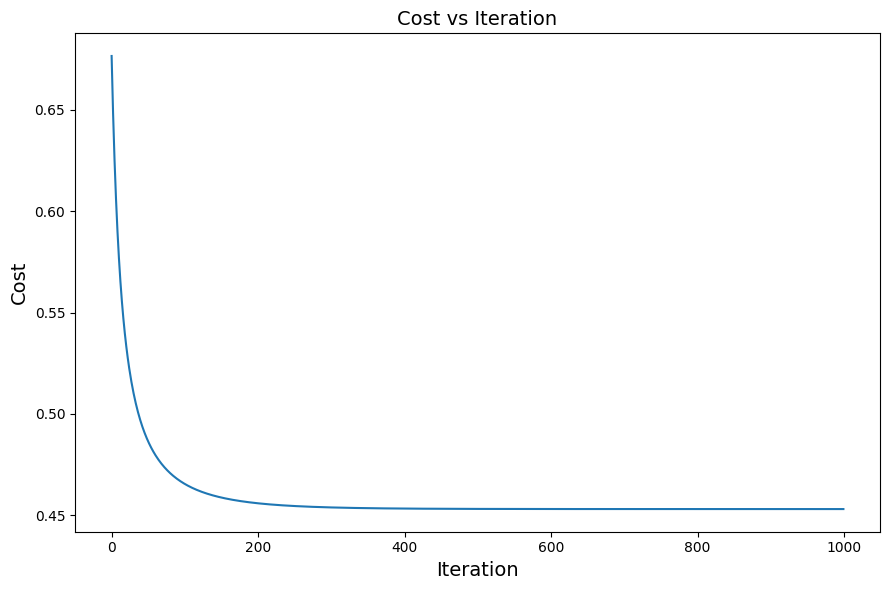

In [ ]:
# Plot cost history
plt.figure(figsize=(9, 6))
plt.plot(cost_history)
plt.xlabel("Iteration", fontsize=14)
plt.ylabel("Cost", fontsize=14)
plt.title("Cost vs Iteration", fontsize=14)
plt.tight_layout()
plt.show()

### Did the model overfitt?

In [ ]:
# Test model
y_train_pred = prediction(X_train_scaled, w, b)
y_test_pred = prediction(X_test_scaled, w, b)


In [ ]:
 # Evaluate train and test performance
train_cost = costfunction_logreg(X_train_scaled, y_train, w, b)
test_cost = costfunction_logreg(X_test_scaled, y_test, w, b)
print(f"\nTrain Loss (Cost): {train_cost:.4f}")
print(f"Test Loss (Cost): {test_cost:.4f}")


Train Loss (Cost): 0.4531
Test Loss (Cost): 0.5146


### How well my model did?

In [ ]:
# Accuracy on test data
test_accuracy = np.mean(y_test_pred == y_test) * 100
print(f"\nTest Accuracy: {test_accuracy:.2f}%")

# Evaluation
confusion_matrix, precision, recall, f1_score = evaluate_classification(y_test, y_test_pred)
print(f"\nConfusion Matrix:\n{confusion_matrix}")
print(f"Precision: {precision:.2f}")
print(f"Recall: {recall:.2f}")
print(f"F1-Score: {f1_score:.2f}")


Test Accuracy: 70.78%

Confusion Matrix:
[[82 18]
 [27 27]]
Precision: 0.60
Recall: 0.50
F1-Score: 0.55


### Visualize the Confusion Matrix - Optional.

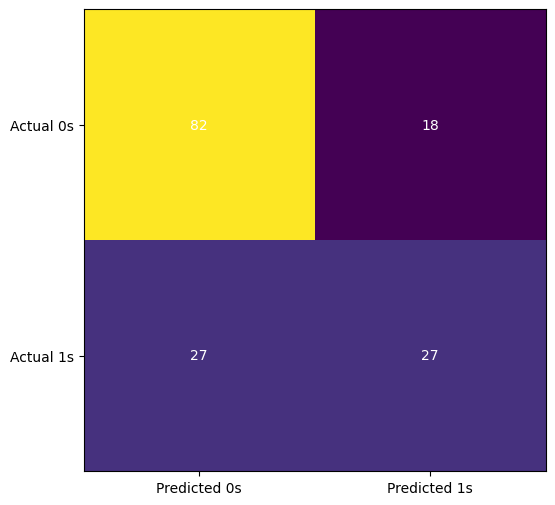

In [ ]:
# Visualizing Confusion Matrix
fig, ax = plt.subplots(figsize=(6, 6))
ax.imshow(confusion_matrix)
ax.grid(False)
ax.xaxis.set(ticks=(0, 1), ticklabels=('Predicted 0s', 'Predicted 1s'))
ax.yaxis.set(ticks=(0, 1), ticklabels=('Actual 0s', 'Actual 1s'))
ax.set_ylim(1.5, -0.5)
for i in range(2):
    for j in range(2):
        ax.text(j, i, confusion_matrix[i, j], ha='center', va='center', color='white')
plt.show()